# Jupyter Notebook: Parsing CSV and Visualizing Data

In this notebook, we will load a CSV file, convert it to a pandas DataFrame, and then create visualizations using seaborn.

In [9]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [10]:
# Import necessary libraries
import pandas as pd  # for data manipulation
import seaborn as sns  # for visualization

## Step 1: Load CSV File and Parse Data

In [11]:
# Load the CSV file into a pandas DataFrame
file_path = 'APCD-Pueblo-Temp.csv'  # Update with actual path to the file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
df.head()

,date,min,max,median,q1,q3,stdev,count
0,2022-05-28T00:00:00.000Z,50.0,106.0,93.0,69.0,96.0,14.274,216
1,2022-05-29T00:00:00.000Z,21.6,100.0,33.8,32.2,66.5,21.490,316
2,2022-05-30T00:00:00.000Z,10.0,32.2,24.4,21.6,27.2,3.868,267
3,2022-05-31T00:00:00.000Z,12.7,30.0,24.4,18.8,27.2,4.939,266
4,2022-06-01T00:00:00.000Z,8.8,27.7,16.1,12.2,18.8,4.345,211


## Step 2: Locate the Date, Min, Max, and Median Data

In [12]:
# Select relevant columns: date, min, max, median
date_min_max_median_df = df[['date', 'min', 'max', 'median']]

# Display the first few rows of the selected data
date_min_max_median_df.head(10)

,date,min,max,median
0,2022-05-28T00:00:00.000Z,50.0,106.0,93.00
1,2022-05-29T00:00:00.000Z,21.6,100.0,33.80
2,2022-05-30T00:00:00.000Z,10.0,32.2,24.40
3,2022-05-31T00:00:00.000Z,12.7,30.0,24.40
4,2022-06-01T00:00:00.000Z,8.8,27.7,16.10
5,2022-06-02T00:00:00.000Z,10.0,33.3,25.25
6,2022-06-03T00:00:00.000Z,10.5,35.5,25.00
7,2022-06-04T00:00:00.000Z,13.3,44.4,30.00
8,2022-06-05T00:00:00.000Z,17.2,44.4,35.00
9,2022-06-06T00:00:00.000Z,16.1,43.3,35.00


## Step 3: Calculate Summary Statistics

In [13]:
# Calculate summary statistics for min, max, and median columns
summary_stats = date_min_max_median_df[['min', 'max', 'median']].describe()

# Display the summary statistics
summary_stats

,min,max,median
count,629.000000,629.000000,629.000000
mean,6.094595,31.112719,19.994006
std,11.065901,14.050367,12.711813
min,-21.600000,-7.700000,-13.300000
25%,-2.700000,21.600000,10.000000
50%,6.100000,31.600000,21.100000
75%,16.100000,40.500000,30.500000
max,50.000000,188.300000,93.000000


## Step 4: Visualize the Data with Seaborn

<ipython-input-14-1d0dfaa3068f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_min_max_median_df['date'] = pd.to_datetime(date_min_max_median_df['date'])


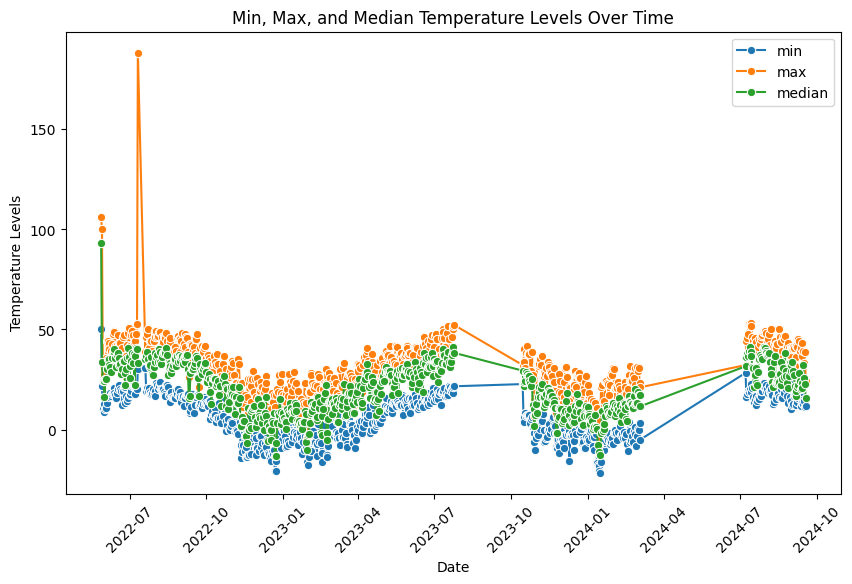

In [14]:
# Convert the Date column to datetime format
date_min_max_median_df['date'] = pd.to_datetime(date_min_max_median_df['date'])

# Plot the Min, Max, and Median values over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='min', data=date_min_max_median_df, marker='o', label='min')
sns.lineplot(x='date', y='max', data=date_min_max_median_df, marker='o', label='max')
sns.lineplot(x='date', y='median', data=date_min_max_median_df, marker='o', label='median')
plt.title('Min, Max, and Median Temperature Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature Levels')
plt.xticks(rotation=45)
plt.legend()
plt.show()

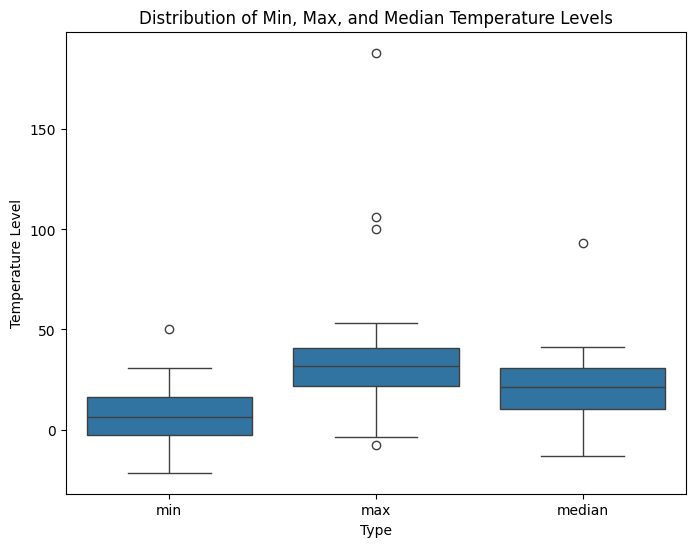

In [15]:
# Melt the data for easier plotting with seaborn
melted_df = date_min_max_median_df.melt(id_vars='date', value_vars=['min', 'max', 'median'], var_name='Type', value_name='Temperature Level')

# Create a box plot for Min, Max, and Median values
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Temperature Level', data=melted_df)
plt.title('Distribution of Min, Max, and Median Temperature Levels')
plt.xlabel('Type')
plt.ylabel('Temperature Level')
plt.show()